<a href="https://colab.research.google.com/github/himanshu2294/GBM_notebook/blob/master/AV_Computer_Vision_Transfer_Learning_Inception_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)



     |████████████████████████████████| 993kB 4.8MB/s 


In [2]:
import os
file_list = drive.ListFile().GetList()

for f in file_list:
  # 3. Create & download by id.
  print('title: %s, id: %s' % (f['title'], f['id']))
  fname =  f['title']
  print('downloading to {}'.format(fname))
  f_ = drive.CreateFile({'id': f['id']})
  f_.GetContentFile(fname)


title: AV_Computer_Vision_Iter2.ipynb, id: 1LRCFPyBjcC3CpmwXtl1VJFYSQycyxHPa
downloading to AV_Computer_Vision_Iter2.ipynb
title: Untitled11.ipynb, id: 1vY0QHrRELKhgad4WoF7LkZ7agv2mYN4A
downloading to Untitled11.ipynb
title: AV_Computer_Vision_Iter1.ipynb, id: 1oIxQv2VkPUt6X4XTbRfaZV6_bfYlUvSd
downloading to AV_Computer_Vision_Iter1.ipynb
title: ML Hikethon.ipynb, id: 1rDOhihP6VIajlsrr19pNeSdpsoqgLI7a
downloading to ML Hikethon.ipynb
title: train.zip, id: 1zRzgwnzMs52MN674v6TFDOMrKi1jg6dN
downloading to train.zip
title: Copy of Kaggle API access example.ipynb, id: 1BeeVYJFGhNBO6tPM7OT64QD3X1wNXx8V
downloading to Copy of Kaggle API access example.ipynb
title: Kaggle API NN and Lgbm, id: 17F8Ra1AFnO_T3vhmZXkecewM-BofhHUd
downloading to Kaggle API NN and Lgbm
title: Copy of Kaggle API NN and Lgbm, id: 1AtnSPuz9fadKrOsQlnzqfpolGOz6MWB_
downloading to Copy of Kaggle API NN and Lgbm
title: Untitled10.ipynb, id: 1X4rxpee7t9MzTIZVPGauJGjT2169bgDY
downloading to Untitled10.ipynb
title: Seekho.A

FileNotDownloadableError: ignored

In [3]:
!unzip train.zip

Archive:  train.zip
   creating: images/
  inflating: images/2870091.jpg      
   creating: __MACOSX/
   creating: __MACOSX/images/
  inflating: __MACOSX/images/._2870091.jpg  
  inflating: images/2860282.jpg      
  inflating: __MACOSX/images/._2860282.jpg  
  inflating: images/2894465.jpg      
  inflating: __MACOSX/images/._2894465.jpg  
  inflating: images/2784253.jpg      
  inflating: __MACOSX/images/._2784253.jpg  
  inflating: images/2853890.jpg      
  inflating: __MACOSX/images/._2853890.jpg  
  inflating: images/2898539.jpg      
  inflating: __MACOSX/images/._2898539.jpg  
  inflating: images/644577.jpg       
  inflating: __MACOSX/images/._644577.jpg  
  inflating: images/2856056.jpg      
  inflating: __MACOSX/images/._2856056.jpg  
  inflating: images/2792357.jpg      
  inflating: __MACOSX/images/._2792357.jpg  
  inflating: images/2904710.jpg      
  inflating: __MACOSX/images/._2904710.jpg  
  inflating: images/2748659.jpg      
  inflating: __MACOSX/images/._2748659.

In [0]:
import zipfile
import pandas as pd
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
# Reading data 

train_df = pd.read_csv('train.csv')


In [5]:
train_df.head()


,image,category
0,2823080.jpg,1
1,2870024.jpg,1
2,2662125.jpg,2
3,2900420.jpg,3
4,2804883.jpg,2


In [0]:
try:
    os.mkdir('./images/1')
    os.mkdir('./images/2')
    os.mkdir('./images/3')
    os.mkdir('./images/4')
    os.mkdir('./images/5')
    
    os.mkdir('./all_categories')
    os.mkdir('./all_categories/testing')
    os.mkdir('./all_categories/training')
    
    os.mkdir('./all_categories/training/1')
    os.mkdir('./all_categories/training/2')
    os.mkdir('./all_categories/training/3')
    os.mkdir('./all_categories/training/4')
    os.mkdir('./all_categories/training/5')
    
    os.mkdir('./all_categories/testing/1')
    os.mkdir('./all_categories/testing/2')
    os.mkdir('./all_categories/testing/3')
    os.mkdir('./all_categories/testing/4')
    os.mkdir('./all_categories/testing/5')
    
except OSError:
    pass

In [0]:

path = "./images/"
destination = "./images/"
for image,category in zip(train_df.image.values, train_df.category.values):
  copyfile(path+image, destination+str(category)+"/"+image)

In [0]:
try:
  os.rmdir('./images/1/training/')
  os.rmdir('./images/2/training/')
  os.rmdir('./images/3/training/')
  os.rmdir('./images/4/training/')
  os.rmdir('./images/5/training/')
  
  os.rmdir('./images/1/testing/')
  os.rmdir('./images/2/testing/')
  os.rmdir('./images/3/testing/')
  os.rmdir('./images/4/testing/')
  os.rmdir('./images/5/testing/')
    
except OSError:
    pass

In [9]:
display(train_df.category.value_counts()); display(len(os.listdir("./images/3"))) 
## 2 additional because of training and testing directories inside a class

1    2120
5    1217
2    1167
3     916
4     832
Name: category, dtype: int64

916

In [0]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
      file = SOURCE + filename
      if os.path.getsize(file) > 0:
          files.append(filename)
      else:
          print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)


In [0]:
cat_1_SOURCE_DIR = "./images/1/"
cat_2_SOURCE_DIR = "./images/2/"
cat_3_SOURCE_DIR = "./images/3/"
cat_4_SOURCE_DIR = "./images/4/"
cat_5_SOURCE_DIR = "./images/5/"

TRAINING_CATS_1_DIR = "./all_categories/training/1/"
TRAINING_CATS_2_DIR = "./all_categories/training/2/"
TRAINING_CATS_3_DIR = "./all_categories/training/3/"
TRAINING_CATS_4_DIR = "./all_categories/training/4/"
TRAINING_CATS_5_DIR = "./all_categories/training/5/"

TESTING_CATS_1_DIR = "./all_categories/testing/1/"
TESTING_CATS_2_DIR = "./all_categories/testing/2/"
TESTING_CATS_3_DIR = "./all_categories/testing/3/"
TESTING_CATS_4_DIR = "./all_categories/testing/4/"
TESTING_CATS_5_DIR = "./all_categories/testing/5/"

In [0]:



split_size = .75
split_data(cat_1_SOURCE_DIR, TRAINING_CATS_1_DIR, TESTING_CATS_1_DIR, split_size)
split_data(cat_2_SOURCE_DIR, TRAINING_CATS_2_DIR, TESTING_CATS_2_DIR, split_size)
split_data(cat_3_SOURCE_DIR, TRAINING_CATS_3_DIR, TESTING_CATS_3_DIR, split_size)
split_data(cat_4_SOURCE_DIR, TRAINING_CATS_4_DIR, TESTING_CATS_4_DIR, split_size)
split_data(cat_5_SOURCE_DIR, TRAINING_CATS_5_DIR, TESTING_CATS_5_DIR, split_size)

In [13]:
len(os.listdir(TESTING_CATS_5_DIR))

305

In [15]:
## REading images from /images directory

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions


Using TensorFlow backend.


In [19]:
# Download the inception v3 weights
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O ./inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2019-05-26 02:39:09--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 2607:f8b0:400e:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘./inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

./inception_v3_weig 100%[===================>]  83.84M   121MB/s    in 0.7s    

2019-05-26 02:39:10 (121 MB/s) - ‘./inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [20]:
!ls -l

total 175156
-rw-r--r-- 1 root root     2487 May 26 02:20  adc.json
drwxr-xr-x 4 root root     4096 May 26 02:21  all_categories
-rw-r--r-- 1 root root   937882 May 26 02:20  AV_Computer_Vision_Iter1.ipynb
-rw-r--r-- 1 root root   948686 May 26 02:20  AV_Computer_Vision_Iter2.ipynb
-rw-r--r-- 1 root root  1764678 May 26 02:20 'Copy of Kaggle API access example.ipynb'
-rw-r--r-- 1 root root    29384 May 26 02:20 'Copy of Kaggle API NN and Lgbm'
drwxrwxr-x 7 root root   266240 May 26 02:21  images
-rw-r--r-- 1 root root 87910968 Mar 28  2018  inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
-rw-r--r-- 1 root root    33725 May 26 02:20 'Kaggle API NN and Lgbm'
drwxrwxr-x 3 root root     4096 May 23 10:10  __MACOSX
-rw-r--r-- 1 root root    36265 May 26 02:20 'ML Hikethon.ipynb'
drwxr-xr-x 1 root root     4096 May 22 16:22  sample_data
-rw-rw-r-- 1 root root    87282 May 23 10:07  train.csv
-rw-r--r-- 1 root root 87294609 May 26 02:20  train.zip
-rw-r--r-- 1 root root      287 May 

In [21]:

# Import the inception model  
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = './inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

# Make all the layers in the pre-trained model non-trainable
for layer in pre_trained_model.layers:
  layer.trainable = False
  
# Print the model summary
pre_trained_model.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_v1_94 (Batc (None, 74, 74, 32)   96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 74, 74, 32)   0           batch_normalization_v1_94[0][0]  
__________________________________________________________________________________________________
conv2d_95 

In [22]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

# Expected Output:
# ('last layer output shape: ', (None, 7, 7, 768))

last layer output shape:  (None, 7, 7, 768)


In [0]:
# Define a Callback class that stops training once accuracy reaches 99.9%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_categorical_accuracy')>0.999):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

      

In [29]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers
from tensorflow.keras import Model

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (5, activation='softmax')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['categorical_accuracy'])

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_v1_94 (Batc (None, 74, 74, 32)   96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 74, 74, 32)   0           batch_normalization_v1_94[0][0]  
__________________________________________________________________________________________________
conv2d_95 

In [30]:
TRAINING_DIR = "./all_categories/training/"
train_datagen = ImageDataGenerator(rescale=1.0/255.,rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=100,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))

VALIDATION_DIR = "./all_categories/testing/"
validation_datagen = ImageDataGenerator(rescale=1.0/255.,rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=100,
                                                              class_mode='categorical',
                                                              target_size=(150, 150))

Found 4688 images belonging to 5 classes.
Found 1564 images belonging to 5 classes.


In [31]:
# Note that this may take some time.


callbacks = myCallback()
history = model.fit_generator(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 100,
            validation_steps = 50,
            verbose = 2,
            callbacks=[callbacks])

Epoch 1/100
16/16 [==============================] - 12s 722ms/step - loss: 0.6148 - categorical_accuracy: 0.5416
 - 33s - loss: 0.4455 - categorical_accuracy: 0.5115 - val_loss: 0.6148 - val_categorical_accuracy: 0.5416
Epoch 2/100
16/16 [==============================] - 11s 692ms/step - loss: 0.3640 - categorical_accuracy: 0.6113
 - 30s - loss: 0.2841 - categorical_accuracy: 0.6762 - val_loss: 0.3640 - val_categorical_accuracy: 0.6113
Epoch 3/100
16/16 [==============================] - 11s 691ms/step - loss: 0.3306 - categorical_accuracy: 0.6720
 - 31s - loss: 0.2509 - categorical_accuracy: 0.7178 - val_loss: 0.3306 - val_categorical_accuracy: 0.6720
Epoch 4/100
16/16 [==============================] - 11s 687ms/step - loss: 0.3938 - categorical_accuracy: 0.6023
 - 30s - loss: 0.2374 - categorical_accuracy: 0.7359 - val_loss: 0.3938 - val_categorical_accuracy: 0.6023
Epoch 5/100
16/16 [==============================] - 12s 725ms/step - loss: 0.3920 - categorical_accuracy: 0.6566
 -

<Figure size 432x288 with 0 Axes>

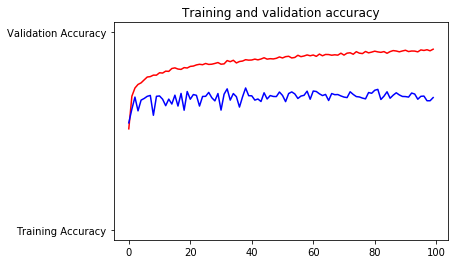

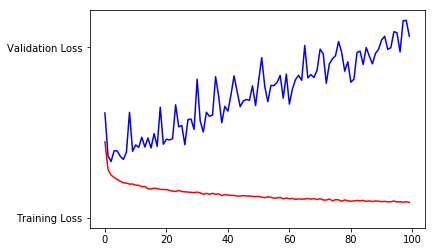

<Figure size 432x288 with 0 Axes>

In [32]:
  %matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()


# Desired output. Charts with training and validation metrics. No crash :)

In [33]:
## Scoring Testing dataset
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()



Saving test_ApKoW4T.csv to test_ApKoW4T.csv


In [0]:
df_test = pd.read_csv('test_ApKoW4T.csv')

In [36]:
df_test.head()

,image
0,1007700.jpg
1,1011369.jpg
2,1051155.jpg
3,1062001.jpg
4,1069397.jpg


In [0]:
try:
  os.mkdir('./eval_performance/test/')
except:
  pass
for im in df_test.image.values:
  copyfile("./images/"+im , './eval_performance/test/'+im)

In [58]:
ep_datagen = ImageDataGenerator(rescale=1./255)

ep_generator = ep_datagen.flow_from_directory(
        './eval_performance/',
        target_size=(150, 150),
        shuffle = False,
        class_mode=None,
        batch_size=100)

filenames = ep_generator.filenames
nb_samples = len(filenames)

predict = model.predict_generator(ep_generator,steps = nb_samples)

Found 2680 images belonging to 1 classes.


In [0]:
predict_class= []

for i in predict:
  predict_class.append(np.argmax(i)+1)

In [0]:
df_test['category'] = predict_class

In [0]:
df_test.to_csv('Result_1.csv', index = False)

In [0]:
files.download('./Result_1.csv')